In [1]:
# Uncomment and run this when using colab.
#%pip install pygeoinf

# Tutorial 3 - Dual spaces

The dual, $X'$, of a Hilbert space, $X$, is the set of all continuous linear functional on $X$. The Riesz representation theorem states that every Hilbert space is isometrically isomorphic to its dual. This means that there is a continuous linear mapping,  $J_{X}\in \mathrm{Hom}(X',X)$, such that
$$
\langle u',u \rangle = (J_{X}u', u)_{X}, 
$$
for every $u' \in X'$ and $u \in X$ while also $\|u'\|_{X'} = \|J_{X}u'\|_{X}$. Within this tutorial we will look at the ```LinearForm``` class that is used to define dual vectors for a given ```HilbertSpace```. We will also see that each ```HilbertSpace``` can automatically generate its dual space. Each ```HilbertSpace``` also provides the mappings to and from its dual as defined through the Riesz representation theorem. 

### The ```LinearForm``` class

To begin, we use ```Euclideanspace``` as an example. Construction of a ```LinearForm``` can be done by specifying its action on a vector. In the example below, we define a linear form that maps a vector in ```X``` to the value of its zeroth-component.

In [2]:
# Set up the space.
from pygeoinf import EuclideanSpace, LinearForm
X = EuclideanSpace(5)

# Define the linear form in terms of its mapping.
xp = LinearForm(X, mapping=lambda x : x[0])

# Test its action on a random vector.
x = X.random()
print(f"x      =  {x}")
print(f"<xp,x> =  {xp(x)}")

x      =  [-1.38986536  1.41385384 -1.29059787 -1.27922313 -1.01385675]
<xp,x> =  -1.3898653565819525


Note that the action of a ```LinearForm``` on a vector is through the object's ```__call__``` method. There is no check within the class that the mapping asigned to a ```LinearForm``` is well-defined, but in a later tutorial we show how this can be done. 

Recall that each ```HilbertSpace``` is associated with a mapping from a vector to its components. We shall write this mapping as $P_{X} \in \mathrm{Hom}(X,\mathbb{R}^{n})$ where $n$ is the dimension of the space. The inverse mapping from a components into the space is then written 
$I_{X}(\mathbb{R}^{n}, x)$. Within this notation we can see $P_{X}$ has standing for a co-ordinate **projection** while $I_{X}$ is a co-ordinate **inclusion**. These mappings induce corresponding co-ordinate mappings on  the dual space. The co-ordinate projection and inclusion, $P_{X'}$ and $I_{X'}$, on the dual space are defined such that for any $x'\in X'$ and $\mathbf{x} \in \mathbb{R}^{n}$ we have 
$$
\langle x', I_{X}\mathbf{x} \rangle = (P_{X'}x', \mathbf{x})_{\mathbb{R}^{n}}
$$
while for $\mathbf{x}' \in \mathbb{R}^{n}$ and $x \in X$
$$
\langle I_{X'}\mathbf{x}', x \rangle = (\mathbf{x}', P_{X}x)_{\mathbb{R}^{n}}.
$$


In the code below, we see that a ```LinearForm``` can be defined directly in terms of its components:

In [3]:
import numpy as np

# Set the component vector.
cp = np.zeros(X.dim)
cp[0] = 1

# Define the linear form
xp = LinearForm(X, components=cp)

# Test its action on a random vector.
x = X.random()
print(f"x      =  {x}")
print(f"<xp,x> =  {xp(x)}")


x      =  [-0.24233335  1.43178878  0.93553834  2.37185457  1.17352932]
<xp,x> =  -0.24233335196822522


The components of a form can be accessed through its ```components``` property:

In [4]:
print(f'The components of the linear form are: {xp.components}')

The components of the linear form are: [1. 0. 0. 0. 0.]


We can also call ```print``` directly on a ```LinearForm``` with the result being that its components are printed:

In [5]:
print(f'The components of the form are: {xp}')

The components of the form are: [1. 0. 0. 0. 0.]


Linear forms over a Hilbert space form a vector space in a natural way. This is implemented in ```LinearForm``` through suitable overloads:

In [6]:
# Define two linear forms
xp1 = LinearForm(X, mapping= lambda x : x[0])
xp2 = LinearForm(X, mapping= lambda x : sum(x))

# Print their action on a random vector.
x = X.random()
a1 = xp1(x)
a2 = xp2(x)
print(f'<xp1, x>              = {a1}')
print(f'<xp2, x>              = {a2}')

# Form a linear combination of the forms
xp3 = 4 * xp1 - xp2 / 5
a3 = 4 * a1 - a2 / 5
print(f"<4 xp1 - xp2, x>      = {xp3(x)}")
print(f"4 <xp1, x> - <xp2, x> = {a3}")

<xp1, x>              = -0.7134335395157048
<xp2, x>              = 2.210691165062834
<4 xp1 - xp2, x>      = -3.295872391075386
4 <xp1, x> - <xp2, x> = -3.295872391075386


Algebriac combinations of forms is generally done lazily. If, however, all the forms involved have their components stored, the components of the new form are determined explicitly which can aid with computational efficiency. 

We can similarly define instances of ```LinearForm``` on more complicated ```HilbertSpaces```. Here we set of an instance of the Sobolev space $H^{s}(\mathbb{S}^{1})$ for $s > 0.5$  and define a linear form that maps a function to its value at a point within the numerical grid. That this linear form is well-defined is discussed below. 

In [7]:
# Construct a Sobolev space on the unit circle.
from pygeoinf.symmetric_space.circle import  Sobolev
Y = Sobolev.from_sobolev_parameters(2, 0.05)

# Set up a linear form that evaluates the function at
#  a specified grid point.
i = Y.dim // 4
th = Y.angles()[i]

vp = LinearForm(Y, mapping=lambda u : u[i])

# Define a function.
f = lambda th :  np.cos(th)
u = Y.project_function(f)

# Print the action of the form and the corresponding function value.
print(f'<vp,u>  = {vp(u)}')
print(f'u(th)   = {f(th)}')

<vp,u>  = 0.001575522243668773
u(th)   = 0.001575522243668773


## The dual of a ```HilbertSpace```

For each ```HilbertSpace``` there is a corresponding dual space which is another instance of ```HilbertSpace```. This can be generated using the ```dual``` property. This is illustrated below:

In [8]:
# Form the dual space.
Xp = X.dual
print(f"The dimension of the dual space is {Xp.dim}")

# Define a linear form an get its components.
xp = LinearForm(X, mapping=lambda x : 2 * x[0] - x[2])
cp = X.to_components(xp)
print(f"The linear form has components {cp}")

# Print the norm of the linear form.
print(f"The linear form has norm: {Xp.norm(xp)}")


The dimension of the dual space is 5
The linear form has components [ 2.  0. -1.  0.  0.]
The linear form has norm: 2.23606797749979


Each ```HilbertSpace``` can map between itself and its dual space using the ```from_dual``` and ```to_dual``` methods. These mappings for a Hilbert space, $X$, are implementation of the operator $J_{X} \in \mathrm{Hom}(X',X)$  and its inverse. In the case of ```EuclideanSpace``` these mappings are *almost* trivial, with a vector and the corresponding form having identical components. But note that the vector and the corresponding dual vector are still different kinds of object. 

In [9]:
# Generate a random vector and dual vector
x = X.random()
yp = X.dual.random()

print(f'x      = {x}')
print(f'yp     = {yp}')

# Print the value of the dual pairing.
print(f'<yp,x> = {yp(x)}')

# Map the dual vector to X.
y = X.from_dual(yp)

# Print the inner product of y and x.
print(f'(y,x)  = {X.inner_product(y,x)}')

# Print the dual norm and that of its representation.
print(f'||yp|| =  {Xp.norm(yp)}')
print(f'||y||  =  {X.norm(y)}')

x      = [-0.66458097  0.69239415 -1.04822411  0.8203489  -0.351203  ]
yp     = [ 1.08011922 -0.83273125 -0.19855755  0.55135081  0.56456581]
<yp,x> = -0.8322492958455953
(y,x)  = -0.8322492958455953
||yp|| =  1.5881581230840236
||y||  =  1.5881581230840236


In more complicated Hilbert spaces the mappings to and from the dual space are more involved. For example, in $H^{s}(\mathbb{S}^{1})$ it can be shown that 
$$
H^{s}(\mathbb{S}^{1})' \cong H^{-s}(\mathbb{S}^{1}), 
$$
in terms of which the necessary mapping from $H^{s}(\mathbb{S}^{1})'$ to $H^{s}(\mathbb{S}^{1})$ can be written
$$
J_{H^{s}(\mathbb{S}^{1})} = (1+\lambda^{2}\Delta)^{-s}.
$$
A further key property of this space is that when $s > 1/2 + k$ we have the continuous embedding
$$
H^{s}(\mathbb{S}^{1}) \subseteq C^{k}(\mathbb{S}^{1}).
$$
This means that  point evaluation defines a continuous linear form on this space so long as  $s > 0.5$. This justifies our definition of the form ```vp``` above, and we can plot its representation as follows:


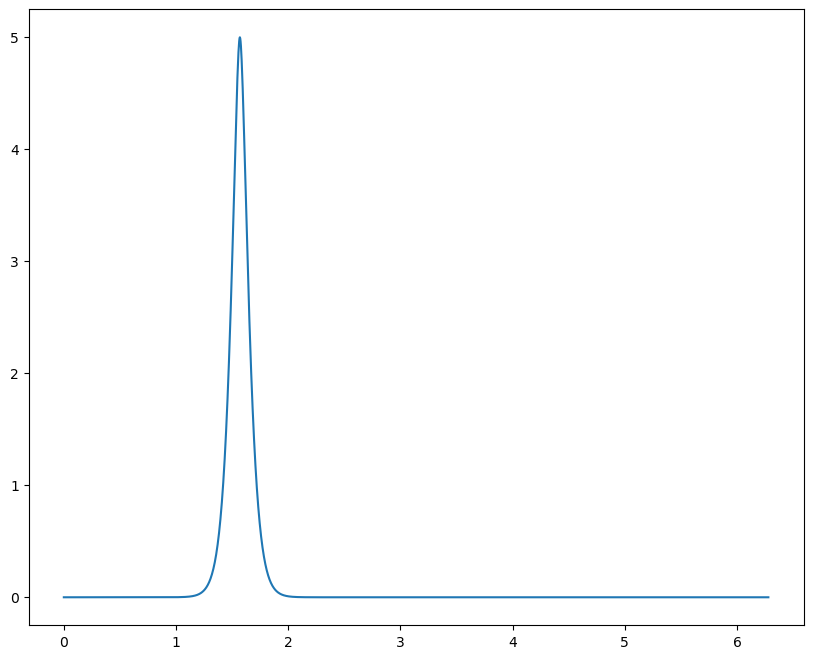

<vp,u> = 0.001575522243668773
(v,u)  = 0.001575522243668448


In [10]:
import matplotlib.pyplot as plt

# Convert the linear form to the space and plot its form.
v = Y.from_dual(vp)
Y.plot(v)
plt.show()

# Check that the vector does the right thing.
print(f'<vp,u> = {vp(u)}')
print(f'(v,u)  = {Y.inner_product(v,u)}')


The Dirac measure, $\delta_{\theta}$, occurs frequently in applications and so it has been implemented directly within ```Sobolev```:

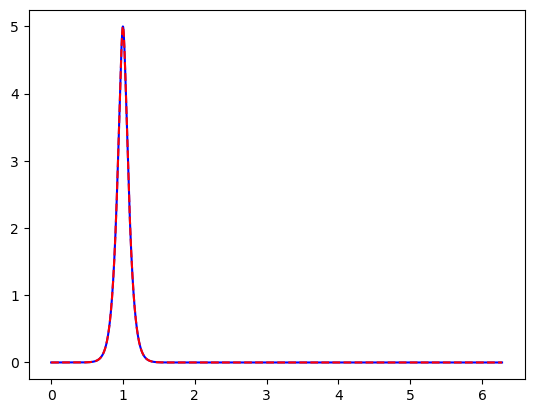

In [11]:
# Set the base point
th = 1

# Get the Dirac measure
vp = Y.dirac(th)

# Form its representation.
v = Y.from_dual(vp)

# This can also be done directly.
w = Y.dirac_representation(th)

# Plot both
fig, ax = plt.subplots()
Y.plot(v, fig=fig, ax=ax, color = 'b')
Y.plot(w, fig=fig, ax=ax, color = 'r', linestyle="--")
plt.show()

Within the previous tutorial, we noted that the static method ```from_sobolev_parameters``` required $s>0.5$. The reason is that this method chooses $k_{\mathrm{max}}$ based on an error estimate linked to the representation of the Dirac measure. 

### Double duals

If $X$ is a Hilbert space and $X'$ its dual, we can also form the double dual $X''$. Strictly, $X$ and $X''$ are not the same objects, but they are canonically isomorphic. Within the ```HilbertSpace``` class, however, the dual of a dual space is set equal to the orignal space. 

This is seen below. 

In [12]:
print(X == X.dual.dual)
print(Y == Y.dual.dual)

True
True


### Constructing ```EuclideanSpace```

Having now introduced dual spaces, we can explain in full detail how the ```EuclideanSpace``` class is implemented, this forming a model for the implementation fo any other ```HilbertSpace```. 

The first point to note is that ```HilbertSpaces``` are not meant to be constructed directly. Rather, the intention is that new classes are defined that inherit from ```HilbertSpace```. This is due to an apparent circularity in the definition of a ```HilbertSpace``` class. To construct a ```HilbertSpace``` we need to provide the ```from_dual``` and ```to_dual``` mappings. But ```LinearForms``` cannot be constructed until the space is already set up. By, however, inheriting from ```HilbertSpace``` within a new class, we can insure that the space can be refered to in its methods, and that these methods cannot be called until the class has been set up. Below we see the implementation of ```EuclideanSpace``` from within the ```pygeoinf``` library. The ```to_component``` and ```from_component``` mappings are trivial, as noted above. For the inner product, we use the standard ```numpy``` function. Lastly, the mappings ```from_dual``` and ```to_dual``` are very simple, just reflecting the fact that the components of a dual vector and its representation are equal.


```python
class EuclideanSpace(HilbertSpace):
    """
    Euclidean space implemented as an instance of HilbertSpace."""

    def __init__(self, dim):
        """
        Args:
            dim (int): Dimension of the space.
        """

        super().__init__(
            dim,
            lambda x: x,
            lambda x: x,
            self.__inner_product,
            self.__to_dual,
            self.__from_dual,
        )

    def __inner_product(self, x1, x2):
        return np.dot(x1, x2)

    def __to_dual(self, x):
        return self.dual.from_components(x)

    def __from_dual(self, xp):
        cp = self.dual.to_components(xp)
        return self.from_components(cp)

    def __eq__(self, other):
        """
        Overload of equality operator for Euclidean spaces.
        """
        return isinstance(other, EuclideanSpace) and self.dim == other.dim
```

To illustrate the contruction of new ```HilbertSpaces``` further, we can generalise Euclidean space by using an inner product of the form
$$
(x,y)_{X} = (M x, y)_{\mathbb{R}^{n}}, 
$$
with $M$ a symmetric matrix and we call the **metric** for the generalised Euclidean space. In this case, the components of a dual vector and its representation are not equal, but related through the action of the inverse metric. The code below implements such a space and checks that the to and from dual mappings work as they should. 

In [13]:
from scipy.linalg import cho_factor, cho_solve
from pygeoinf import  HilbertSpace

class GeneralisedEuclideanSpace(HilbertSpace):
    """
    Class for a generalised Euclidean space whose inner
    product is defined by a metric tensor.
    """

    def __init__(self, dim, metric, /, *, inverse_metric=None):
        """
        Args:
            dim (int): Dimension of the space.
            metric (matrix-like): The metric tensor.
        """
        self._metric = metric
        self._factor = cho_factor(metric)
        super().__init__(
            dim,
            lambda x: x,
            lambda x: x,
            self._inner_product,
            self._to_dual,
            self._from_dual
        )


    def _inner_product(self, x1, x2):
        return np.dot(self._metric @ x1, x2)

    def _from_dual(self, xp):
        cp = self.dual.to_components(xp)
        c = cho_solve(self._factor, cp)
        return self.from_components(c)

    def _to_dual(self, x):
        cp = self._metric @ x
        return self.dual.from_components(cp)


# Set the dimension of the space.
dim = 4

# Generate a metric tensor as a self-adjoint matrix.
metric = np.random.randn(dim, dim)
metric = np.identity(dim) + 5 * metric @ metric.T

print(f'The metric is:\n {metric}')

# Construct the Hilbert space.
X = GeneralisedEuclideanSpace(dim, metric)

# Test the basic identities on random vectors.
x = X.random()
y = X.random()

print(f'x      = {x}')
print(f'y      = {y}')
print(f'(x,y)  = {X.inner_product(x,y)}')

xp = X.to_dual(x)
print(f'xp     = {xp}')
print(f'<xp,y> = {xp(y)}')

zp = X.dual.random()
print(f'zp     = {zp}')
print(f'<zp,y> = {zp(y)}')
z = X.from_dual(zp)
print(f'z      = {z}')
print(f'(z,y)  = {X.inner_product(z,y)}')

The metric is:
 [[19.54939984  7.08757707  0.14715942  9.40910625]
 [ 7.08757707  5.43336596 -1.74171191  5.25013967]
 [ 0.14715942 -1.74171191  5.4282906   2.70843493]
 [ 9.40910625  5.25013967  2.70843493 26.7291372 ]]
x      = [ 0.98192531  0.22871852 -0.50452355  0.02436852]
y      = [ 0.2319496   1.7295361  -0.18132999  0.05678919]
(x,y)  = 21.87446298354073
xp     = [20.97215129  9.20885557 -2.92656213  9.72472408]
<xp,y> = 21.87446298354073
zp     = [-0.07872609  1.17705912 -0.24144586 -0.34286018]
<zp,y> = 2.0418163760061514
z      = [-0.18113854  0.59953407  0.19605047 -0.08668951]
(z,y)  = 2.0418163760061514


The implementation could be improved in various ways. We might, for example, allow the metric to be given in a more general form (e.g., as a ```scipy.sparse``` ```LinearOperator```) and its inverse computed using iterative methods. We might also allow the user to optionally provide the inverse metric directly. Such steps would be particularly useful if the dimension of the space is large. 